In [ ]:
%reload_ext nb_black

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

data_url = "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/nba_player_seasons.csv"

* A glossary of abbreviations can be found [here](https://www.basketball-reference.com/about/glossary.html)

* Read the data located at `data_url` into a `pandas` dataframe

In [6]:
nba = pd.read_csv(data_url)

Get to know the data, what things should we explore?

* List of things I must insist we explore (the rest is up to you)
  * The number of rows/columns
  * The datatypes of each column
  

In [7]:
print(nba.shape)
print(nba.info())

(2141, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2141 entries, 0 to 2140
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Seas    2141 non-null   int64  
 1   Player  2141 non-null   object 
 2   Pos     2141 non-null   object 
 3   Age     2141 non-null   int64  
 4   Tm      2141 non-null   object 
 5   G       2141 non-null   int64  
 6   GS      2141 non-null   int64  
 7   MP      2141 non-null   float64
 8   FG      2141 non-null   float64
 9   FGA     2141 non-null   float64
 10  FG%     2131 non-null   float64
 11  3P      2141 non-null   float64
 12  3PA     2141 non-null   float64
 13  3P%     1967 non-null   float64
 14  2P      2141 non-null   float64
 15  2PA     2141 non-null   float64
 16  2P%     2110 non-null   float64
 17  eFG%    2131 non-null   float64
 18  FT      2141 non-null   float64
 19  FTA     2141 non-null   float64
 20  FT%     2037 non-null   float64
 21  ORB     2141 non-null   fl

In [8]:
nba.head()

,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2019,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2019,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,2019,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,2019,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,2019,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


## What is a 'typical' number of the points column (`'PTS'`)?

Present your answer(s) with proof:
* numerically
  * generate at least 2 summary metrics that can be thought of as 'typical'
* graphically
  * what plot type might we use?
  * add your numeric values to the plot

In [38]:
mean = nba['PTS'].mean()
mean
med = nba['PTS'].median()
med
mode = nba['PTS'].astype(int).mode()
mode


0    5
dtype: int32

# Graphically

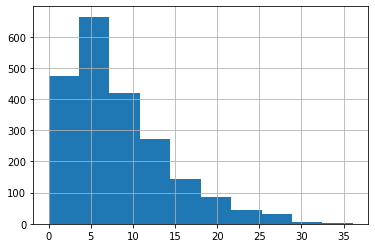

In [18]:
nba["PTS"].hist()
plt.show()

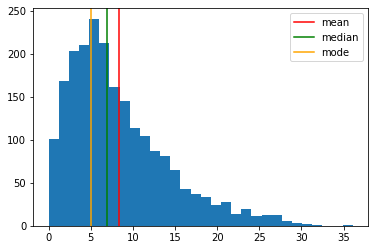

In [39]:
plt.hist(nba["PTS"], bins=30)
plt.axvline(mean, c="red", label='mean')
plt.axvline(med, c="green", label='median')
plt.axvline(mode[0], c="orange",label='mode')
plt.legend()
plt.show()

A note about `sns.distplot` (and plots like it).  Just like a histogram or a bar plot, this '`distplot`' uses height to show which values are the most probable.  A histogram and barplot will often use counts to show how probable each value use (the taller, the more likely).

A '`distplot`' is using a 'kernel density estimate' to show the probability density of each value rather than count.  The area under a probability distribution should sum to 1 by definition; so it can be surprising that in the below plot we see numbers greater than 1.

Remember that area has more to it than height.  For example, in our plot we have rectangles who's area is modeled by `height * width`.  The width here is the missing piece for why we can have values greater than one.  You can think of this as a probability per unit rather than a raw probability. 

[Here](https://stats.stackexchange.com/a/4223/102646) is a great, more in depth explanation.

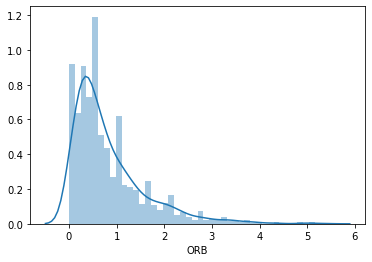

In [13]:
sns.distplot(nba["ORB"])
plt.show()

## What shot percentage stat has the most variation?

Before we do that:
* Create a dataframe that contains only the columns with `'%'` in the column name. Name this data frame `percents`

In [42]:
# nba.columns
percents = nba.filter(like='%')

* In this data we have missing values, the code below shows a count of missing values per column.  Can you explain why we'd have missing values here?

In [43]:
percents.isna().sum()

FG%      10
3P%     174
2P%      31
eFG%     10
FT%     104
dtype: int64

* Drop NAs from this `percents` dataframe

In [44]:
percents = percents.dropna()

Back to the original question: What shot percentage stat has the most variation?

* What metric(s) can we use for this?
* What plot type(s) can we use to show this?

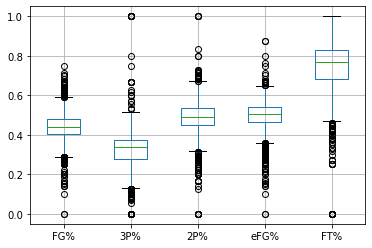

In [46]:
# var and std
percents.describe()
percents.boxplot()

## Using `.describe()` with `pandas`

* `.describe()` might have already come up depending on how we answered the above questions
* Let's explore `.describe()`'s options using `?` and `help()`

## Descriptive statistics with `groupby`

Sometimes we want descriptive statistics grouped by a categorical column in our data.  For example, instead of the average of the `'PTS'` column for our full dataset, maybe we want to see the average of the `'PTS'` column for each player.

* Calculate the average `'PTS'` grouped by `'Player'`

In [54]:
nba.groupby("Player")['PTS'].mean()

Player
A.J. Hammons       2.200000
Aaron Brooks       4.800000
Aaron Gordon      13.875000
Aaron Harrison     2.600000
Aaron Holiday      5.900000
                    ...    
Zhaire Smith       6.700000
Zhou Qi            1.600000
Álex Abrines       5.333333
Ángel Delgado      1.500000
Ömer Aşık          2.633333
Name: PTS, Length: 822, dtype: float64

* Calculate the average, standard deviation, and count of `'PTS'` for each `'Tm'` (team)
* Sort this output in descending order by average points

## Correlations

If we want to explore relationships between 2 numeric columns we might use a correlation.  The correlation between 2 numeric columns ranges between `[-1, 1]`.

* A correlation of -1 is a strong negative correlation
  * For example, `amount of money spent` and `amount of money saved` would be negatively correlated.  As the `amount of money spent` goes up the `amount of money saved` would go down and vice versa.
* A correlation of 0 is a weak correlation
  * For example, the `number of words in the harry potter books` and the `number of arrests in costa rica` are likely not very related.
* A correlation of 1 is a strong positive correlation
  * For example, `amount of ice cream sold` and `temperature` are likely positively correlated.  As the `temperature` goes up the `amount of ice cream sold` likely goes up as well.
  
Note the classic phrase: "correlation does not equal causation".  Just because 2 things are related doesn't mean one thing causes the other ([this site](https://www.tylervigen.com/spurious-correlations) has examples of correlations that are 'spurious' that is, the 2 variables appear related, but they likely aren't).

To run a correlation on a `pandas` dataframe we can use `.corr()`.

* Apply `.corr()` to our dataframe
* What numeric variables are related? is this a positive or negative relationship?

In [47]:
nba.head()

,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2019,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2019,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,2019,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,2019,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,2019,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


In [49]:
nba.corr()["Age"].sort_values()

Seas   -0.062238
ORB    -0.027973
BLK    -0.027747
2PA    -0.000906
2P     -0.000871
FTA     0.010425
2P%     0.024991
FG%     0.033019
FT      0.033898
TRB     0.037276
TOV     0.041575
3P%     0.041905
STL     0.042097
FG      0.044669
FGA     0.048297
GS      0.052577
PF      0.053632
PTS     0.056049
DRB     0.061908
eFG%    0.076017
G       0.097129
MP      0.102553
3PA     0.111453
AST     0.119455
3P      0.125774
FT%     0.160941
Age     1.000000
Name: Age, dtype: float64

## Creating your own statistics

Sometimes you might create some metric to summarize a record.  For example, we all have a credit score that is a combination of a lot of separate metrics.  Some of these style of metrics might be referred to as a index (i.e. a financial index), note that this is different than a `pandas` index.

How might we create a player rating metric for our data?

In [51]:
nba["rating_index"] = nba['PTS'] * 0.5 + nba["DRB"] * 0.3